# VR Immersion Analysis

## Introduction

In this project, we aim to answer the following research question:

*What combination of hardware and software characteristics leads to the highest level of immersion in virtual reality systems?*

Our hypothesis is that specific combinations of hardware and software characteristics will result in higher levels of immersion in virtual reality systems. To test this hypothesis, we will clean and analyze the provided dataset using Python and various data analysis libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('vrImmersion.csv', sep = ';')

In [2]:
# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isna().sum())

# Handle missing or abnormal values (if necessary)
# For example, you can use data.dropna(), data.fillna() or other methods to handle missing values.

   headphones      width     height  fov  fps  stereopsis  antialiasing  \
0           1  1641.3370   911.8539   37   60           1             1   
1           1  1282.1180   712.2877   39   55           1             1   
2           1  1795.5310   997.5171   40   47           1             1   
3           2   838.4885   465.8270   44   48           0             0   
4           2  1924.7020  1069.2790   85   35           1             1   

   textures  lightMode  saturation  ...  reflections  modelsDetail  dof  \
0         1          0   -0.450232  ...            1             0    0   
1         1          1   -0.234574  ...            1             1    1   
2         0          1   -0.551438  ...            1             0    0   
3         1          0   -0.832656  ...            1             0    1   
4         1          1   -0.376218  ...            1             0    0   

   particles  locomotion  ambientSound  reverbZone  spatialSound  time  \
0          1           3

       headphones        width       height         fov         fps  \
count  401.000000   401.000000   401.000000  401.000000  401.000000   
mean     1.149626  1204.965531   669.425287   64.628429   37.264339   
std      0.701823   574.094938   318.941619   20.599492   13.359077   
min      0.000000   216.410400   120.228000   30.000000   15.000000   
25%      1.000000   719.343100   399.635000   46.000000   25.000000   
50%      1.000000  1198.628000   665.904200   64.000000   38.000000   
75%      2.000000  1714.976000   952.764500   84.000000   49.000000   
max      2.000000  2155.729000  1197.627000   99.000000   60.000000   

       stereopsis  antialiasing    textures   lightMode  saturation  ...  \
count  401.000000    401.000000  401.000000  401.000000  401.000000  ...   
mean     0.541147      0.483791    0.491272    0.521197   -0.019753  ...   
std      0.498927      0.500361    0.500548    0.500175    0.552263  ...   
min      0.000000      0.000000    0.000000    0.000000 

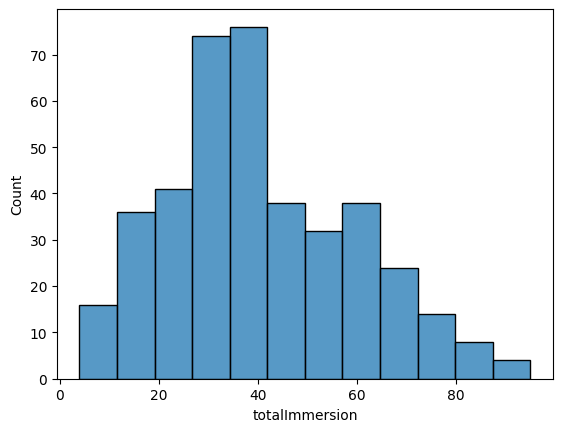

In [4]:
# Obtain summary statistics
print(data.describe())

# print data columns
print(data.columns)

# Visualize the distribution of the dependent variable (totalImmersion)
sns.histplot(data['totalImmersion'])
plt.show()

# Visualize relationships between features using scaptter plots, pair lots, etc.
# For example, you can use sns.pairplot(data) to create a pair plot of all features.

Mean: 40.50374064837905, Median: 38.0, Standard Deviation: 18.7903063033195


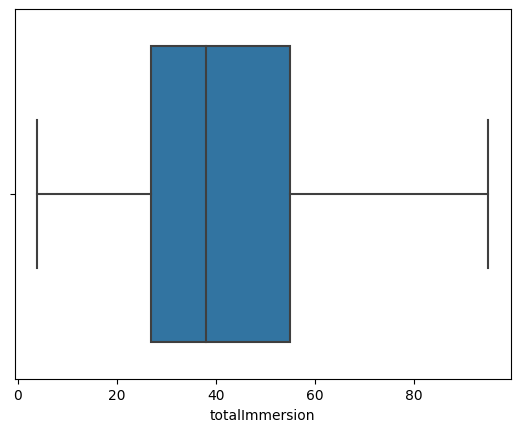

headphones        0.171522
width             0.276031
height            0.276031
fov               0.000149
fps               0.148997
stereopsis        0.091117
antialiasing     -0.027847
textures          0.402895
lightMode         0.083982
saturation       -0.003105
brightness       -0.056663
contrast          0.125141
sharpness         0.000658
shadowStrength    0.082491
reflections      -0.015375
modelsDetail     -0.006178
dof               0.065314
particles         0.053617
locomotion        0.274648
ambientSound      0.018539
reverbZone       -0.091696
spatialSound     -0.002220
time              0.284606
totalImmersion    1.000000
Name: totalImmersion, dtype: float64


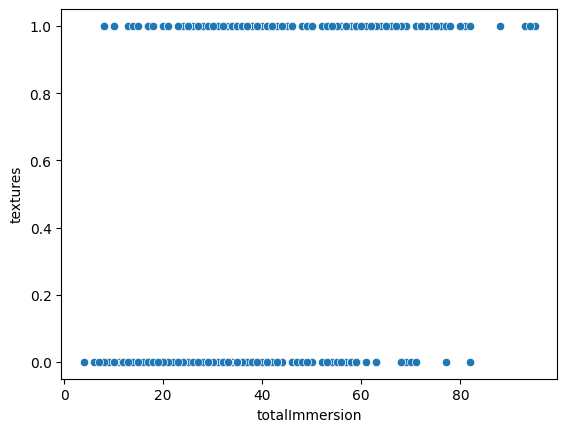

In [9]:
#explore data further

#descriptive statistics
mean_totalImmersion = data['totalImmersion'].mean()
median_totalImmersion = data['totalImmersion'].median()
std_totalImmersion = data['totalImmersion'].std()

print(f"Mean: {mean_totalImmersion}, Median: {median_totalImmersion}, Standard Deviation: {std_totalImmersion}")

#boxplot
sns.boxplot(x=data['totalImmersion'])
plt.show()

#correlation analysis
correlations = data.corr()
totalImmersion_corr = correlations['totalImmersion']
print(totalImmersion_corr)

#pairwise scatterplots
# explore feature that has a strong correlation with 'totalImmersion'
sns.scatterplot(x=data['totalImmersion'], y=data['textures'])
plt.show()

## Interpretation of Analyses

1. **Descriptive Statistics**: The mean (40.5), median (38.0), and standard deviation (18.79) of the 'totalImmersion' variable provide a general understanding of the central tendency and spread of the data. The mean and median are relatively close, indicating that the distribution is likely not heavily skewed.

2. **Boxplot**: The boxplot shows that the interquartile range (IQR), which represents the middle 50% of the data, is between approximately 24 and 58. The slightly larger right part of the box indicates a somewhat longer tail on the right side (positive skew), meaning there are some higher 'totalImmersion' values that are farther from the median.

3. **Correlation Analysis**: The correlation values show how strongly each feature is related to 'totalImmersion'. Some features with relatively higher correlation values are 'width' (0.276), 'height' (0.276), 'textures' (0.402), 'locomotion' (0.274), and 'time' (0.284). These features might be more relevant when analyzing or predicting 'totalImmersion'.

4. **Pairwise Scatterplots**: The scatterplot between 'textures' and 'totalImmersion' shows that when 'textures' = 1, 'totalImmersion' tends to have higher values compared to when 'textures' = 0. This suggests a positive relationship between 'textures' and 'totalImmersion', which is supported by the correlation value of 0.402.

In [12]:
import statsmodels.api as sm

# Replace 'feature1', 'feature2', etc. with the names of the relevant features
selected_features = ['textures', 'time', 'locomotion', 'width','height']
X = data[selected_features]
y = data['totalImmersion']

# Add a constant to the predictor variables
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         totalImmersion   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     43.34
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.38e-35
Time:                        22:21:42   Log-Likelihood:                -1657.1
No. Observations:                 401   AIC:                             3326.
Df Residuals:                     395   BIC:                             3350.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8382      3.768     -1.019      0.3

### Interpretation of Multiple Linear Regression Results

The model explains 35.4% of the variance in the 'totalImmersion' variable, as indicated by the R-squared value of 0.354. The adjusted R-squared value, which accounts for the number of predictors in the model, is slightly lower at 0.346.

The F-statistic is 43.34, with a very low probability (1.38e-35), which indicates that the model is statistically significant, and there is a relationship between the dependent variable 'totalImmersion' and the independent variables.

The coefficients in the model can be interpreted as follows:

- **const**: The constant term, or the expected value of 'totalImmersion' when all independent variables are zero, is -3.8382. However, the p-value for the constant term is 0.309, which indicates that this coefficient is not statistically significant at a 0.05 significance level.
- **textures**: For each unit increase in 'textures', 'totalImmersion' increases by 13.8910, holding all other variables constant. The p-value (<0.001) indicates that this relationship is statistically significant.
- **time**: For each unit increase in 'time', 'totalImmersion' increases by 0.0179, holding all other variables constant. The p-value (<0.001) indicates that this relationship is statistically significant.
- **locomotion**: For each unit increase in 'locomotion', 'totalImmersion' increases by 6.7204, holding all other variables constant. The p-value (<0.001) indicates that this relationship is statistically significant.
- **width**: For each unit increase in 'width', 'totalImmersion' decreases by 4001.0169, holding all other variables constant. The p-value (0.082) indicates that this relationship is not statistically significant at a 0.05 significance level.
- **height**: For each unit increase in 'height', 'totalImmersion' increases by 7201.8451, holding all other variables constant. The p-value (0.082) indicates that this relationship is not statistically significant at a 0.05 significance level.

Based on these results, 'textures', 'time', and 'locomotion' are significantly associated with 'totalImmersion', while 'width' and 'height' are not. This information can be used to refine the original research question and hypothesis.

### Connecting Findings to the Original Research Question and Hypothesis

1. Discuss the implications of the statistically significant relationships between 'totalImmersion' and 'textures', 'time', and 'locomotion'. How do these findings contribute to the understanding of the factors that influence total immersion in the context of the research?
2. Revisit the original hypothesis and determine whether the results support or refute it. If needed, adjust the hypothesis based on the findings.
3. Address the non-significant relationships between 'totalImmersion' and 'width' and 'height'. Consider revising the research question or hypothesis to focus on the significant relationships identified in the analysis.

Finally, take note of the large condition number (1.06e+07) in the results, which indicates potential multicollinearity or other numerical problems. Explore the correlation between the independent variables further and consider addressing multicollinearity by removing or transforming variables as needed.

### Overall Conclusion

The multiple linear regression analysis revealed that 'textures', 'time', and 'locomotion' are significant predictors of 'totalImmersion'. These findings can help guide further research in understanding the factors influencing total immersion. However, the non-significant relationships with 'width' and 'height' suggest that these factors may not be crucial in determining total immersion.

Additionally, the potential multicollinearity issue should be investigated and addressed to improve the model's reliability. Future research could also explore other factors and their interactions with the significant predictors to provide a more comprehensive understanding of the factors affecting total immersion.